In [1]:
# imports 

from sklearn import datasets, metrics 
from EMGaussianNaiveBayes import EMGaussianNaiveBayes 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# load data

data, target = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
X_train /= 16
X_test /= 16

In [3]:
# EM Gaussian Naive Bayes 

emgnb = EMGaussianNaiveBayes()
emgnb.fit(X_train, 10)

True

In [4]:
y_pred = emgnb.predict(X_train)

In [10]:
conf_mat = metrics.confusion_matrix(y_train, y_pred)
conf_mat_sorted = [list(map(sorted, conf_mat.T))]

In [20]:
conf_mat

array([[  1,   1,   0,   0,   3, 121,   0,   0,   1,   0],
       [ 75,   4,   3,   0,  39,   0,   6,   0,   0,   0],
       [ 35,   0,  58,   2,   7,   0,  10,   1,   2,   1],
       [  1,   3,  60,   0,  23,   0,  25,   0,   0,   2],
       [  2,  19,   0,   0,   1,   0,   1,  99,   0,   1],
       [ 11,  47,   7,   1,  58,   0,   2,   0,   0,   2],
       [  4,   1,   0,   0,   2,   0,   0,   0, 132,   0],
       [  0,  75,   0,   0,   1,   0,  50,   0,   0,   1],
       [ 24,  10,  13,   0,  56,   0,  28,   0,   0,   3],
       [  1,  13,  10,   0,  59,   0,  33,   0,   2,   4]])

In [7]:
mean = emgnb.mean_table
mean.shape

(10, 64)

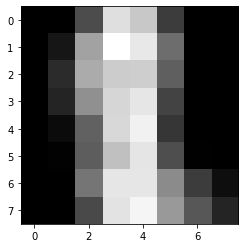

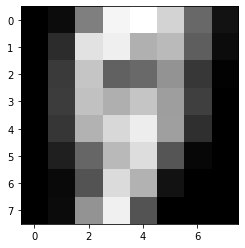

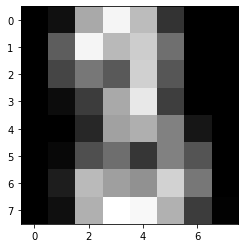

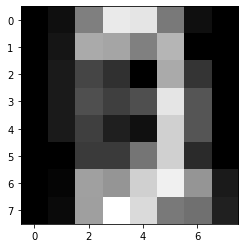

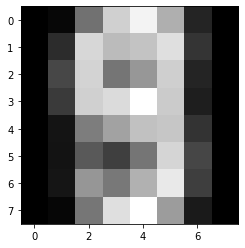

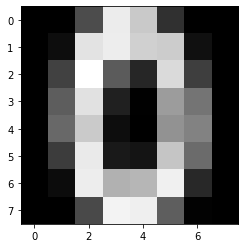

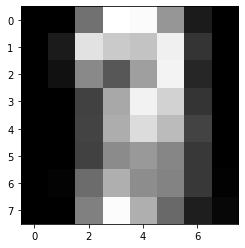

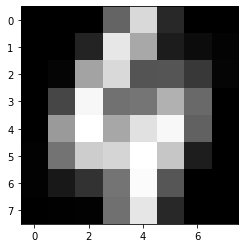

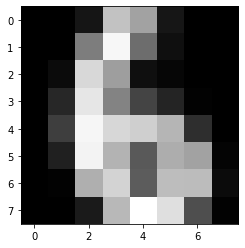

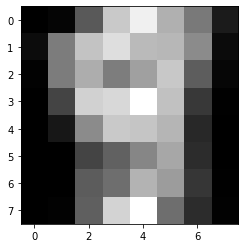

In [9]:
from matplotlib import pyplot as plt 

for img in mean: 
    plt.imshow(img.reshape(8, 8), cmap='gray')
    plt.show()

In [23]:
look_up_table = {
    0:1,
    1:7, 
    2:3, 
    3:2, 
    4:9, 
    5:0, 
    6:8, 
    7:4, 
    8:6, 
    9:5, 
}

In [24]:
pred = emgnb.predict(X_train)

predictions = [look_up_table[p] for p in pred]

print("Classification report SKLearn NBC:\n%s\n"
      % (metrics.classification_report(y_train, predictions)))
print("Confusion matrix SKLearn NBC:\n%s" % metrics.confusion_matrix(y_train, predictions))

Classification report SKLearn NBC:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       127
           1       0.49      0.59      0.53       127
           2       0.67      0.02      0.03       116
           3       0.40      0.53      0.45       114
           4       0.99      0.80      0.89       123
           5       0.14      0.02      0.03       128
           6       0.96      0.95      0.96       139
           7       0.43      0.59      0.50       127
           8       0.18      0.21      0.19       134
           9       0.24      0.48      0.32       122

    accuracy                           0.52      1257
   macro avg       0.55      0.51      0.49      1257
weighted avg       0.55      0.52      0.49      1257


Confusion matrix SKLearn NBC:
[[121   1   0   0   0   0   1   1   0   3]
 [  0  75   0   3   0   0   0   4   6  39]
 [  0  35   2  58   1   1   2   0  10   7]
 [  0   1   0  60   0   2   0   3  25  23]
 [ 

In [26]:
pred = emgnb.predict(X_test)

predictions = [look_up_table[p] for p in pred]

print("Classification report SKLearn NBC:\n%s\n"
      % (metrics.classification_report(y_test, predictions)))
print("Confusion matrix SKLearn NBC:\n%s" % metrics.confusion_matrix(y_test, predictions))

Classification report SKLearn NBC:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.49      0.69      0.58        55
           2       0.00      0.00      0.00        61
           3       0.43      0.45      0.44        69
           4       1.00      0.66      0.79        58
           5       0.33      0.04      0.07        54
           6       1.00      0.98      0.99        42
           7       0.43      0.71      0.54        52
           8       0.13      0.23      0.17        40
           9       0.29      0.52      0.37        58

    accuracy                           0.51       540
   macro avg       0.51      0.52      0.49       540
weighted avg       0.50      0.51      0.48       540


Confusion matrix SKLearn NBC:
[[48  0  0  0  0  0  0  0  0  3]
 [ 0 38  0  0  0  0  0  1  2 14]
 [ 0 20  0 32  0  0  0  0  5  4]
 [ 0  7  0 31  0  1  0  4 17  9]
 [ 0  0  0  0 38  0  0 16  0  4]
 [ 0  4  0

/Users/hampusrosvall/anaconda3/envs/edan95/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
metrics.completeness_score(y_train, predictions)

0.5484794975025998

In [17]:
model = KMeans()

model.fit(X_train, 10)

k_pred = model.predict(X_train)

print("Classification report SKLearn NBC:\n%s\n"
      % (metrics.classification_report(y_train, k_pred)))
print("Confusion matrix SKLearn NBC:\n%s" % metrics.confusion_matrix(y_train, k_pred))

Classification report SKLearn NBC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.00      0.00      0.00       127
           2       0.04      0.09      0.05       116
           3       0.03      0.04      0.03       114
           4       0.00      0.00      0.00       123
           5       0.00      0.00      0.00       128
           6       0.01      0.01      0.01       139
           7       0.00      0.00      0.00       127
           8       0.00      0.00      0.00       134
           9       0.00      0.00      0.00       122

    accuracy                           0.01      1257
   macro avg       0.01      0.01      0.01      1257
weighted avg       0.01      0.01      0.01      1257


Confusion matrix SKLearn NBC:
[[  0   1   0   0   0   0   0 126   0   0]
 [  1   0  16   0  18   0  92   0   0   0]
 [  0   0  10   2  96   0   7   1   0   0]
 [  1   0 104   4   2   0   3   0   0   0]
 [ 

/Users/hampusrosvall/anaconda3/envs/edan95/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
